# Retail Data Wrangling and Analytics

In [1]:
# Import modules 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Load Data from PSQL into DataFrame

**Setup Docker Containers**

![](https://i.imgur.com/VQrBVBk.jpg)

```
#make sure you have both Jupyter and PSQL docker container running
docker ps

#Attach a bridge network to both containers so they can communicate with each other
docker network create jarvis-net
#this command works on running containers
docker network connect jarvis-net jarvis-jupyter
docker network connect jarvis-net jarvis-psql

#verify both containers are attached to the jarvis-net
docker network inspect trading-net

#Note: instead of using `localhost`, you should use container names as hostnames.
```

**Data Preperation**

- Use [pandas.read_sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html) api to load the PSQL retail table into a Pandas DataFrame

![](https://i.imgur.com/AmkAP63.jpg)

- Get familair with the transaction date with `df.head()`, `df.sample(10)`, `df.info()`, `df.describe()`, etc..



In [2]:
#install psql "driver"
!pip3 install psycopg2-binary

     |████████████████████████████████| 3.0 MB 14.2 MB/s eta 0:00:01


In [3]:
url = "https://raw.githubusercontent.com/jarviscanada/jarvis_data_eng_demo/feature/data/python_data_wrangling/data/online_retail_II.csv"
retail_df = pd.read_csv(url)
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
retail_df.info()
retail_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


# Load CSV into Dataframe
Alternatively, the LGS IT team also dumped the transactional data into a [CSV file](https://raw.githubusercontent.com/jarviscanada/jarvis_data_eng_demo/feature/data/python_data_wrangling/data/online_retail_II.csv). However, the CSV header (column names) doesn't follow the snakecase or camelcase naming convention (e.g. `Customer ID` instead of `customer_id` or `CustomerID`). As a result, you will need to use Pandas to clean up the data before doing any analytics. In addition, unlike the PSQL scheme, CSV files do not have data types associated. Therefore, you will need to cast/convert certain columns into correct data types (e.g. DateTime, numbers, etc..)

**Data Preperation**

- Read the `data/online_retail_II.csv` file into a DataFrame
- Rename all columns to upper camelcase or snakecase
- Convert/cast all columns to the appropriate data types (e.g. datetime)

In [5]:
# Rename columns to snakecase
new_column_names = ['invoice', 'stock_code', 'description', 'quantity', 'invoice_date', 'price', 'customer_id', 'country']
retail_df.columns = new_column_names
retail_df.head()

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
# Convert invoice_date data type
retail_df['invoice_date'] = pd.to_datetime(retail_df['invoice_date'])

# Total Invoice Amount Distribution

In [12]:
# Calculate the invoice amount
retail_df['invoice_amount'] = retail_df['quantity'] * retail_df['price']
invoice_total = retail_df[retail_df['invoice_amount'] > 0].groupby('invoice')['invoice_amount'].sum()
print(invoice_total.head())

invoice
489434     505.30
489435     145.80
489436     630.33
489437     310.75
489438    2286.24
Name: invoice_amount, dtype: float64


In [16]:
# Distribution of invoice with min, max, median, mod, and mean
min_amount = invoice_total.min()
max_amount = invoice_total.max()
median_amount = invoice_total.median()
mode_amount = invoice_total.mode().iloc[0]
mean_amount = invoice_total.mean()

# Display individual values
print(f"Minimun: {min_amount}")
print(f"Maximun: {max_amount}")
print(f"Median: {median_amount}")
print(f"Mode: {mode_amount}")
print(f"Mean: {mean_amount}")

Minimun: 0.19
Maximun: 168469.6
Median: 304.3150000000001
Mode: 15.0
Mean: 523.3037611158244


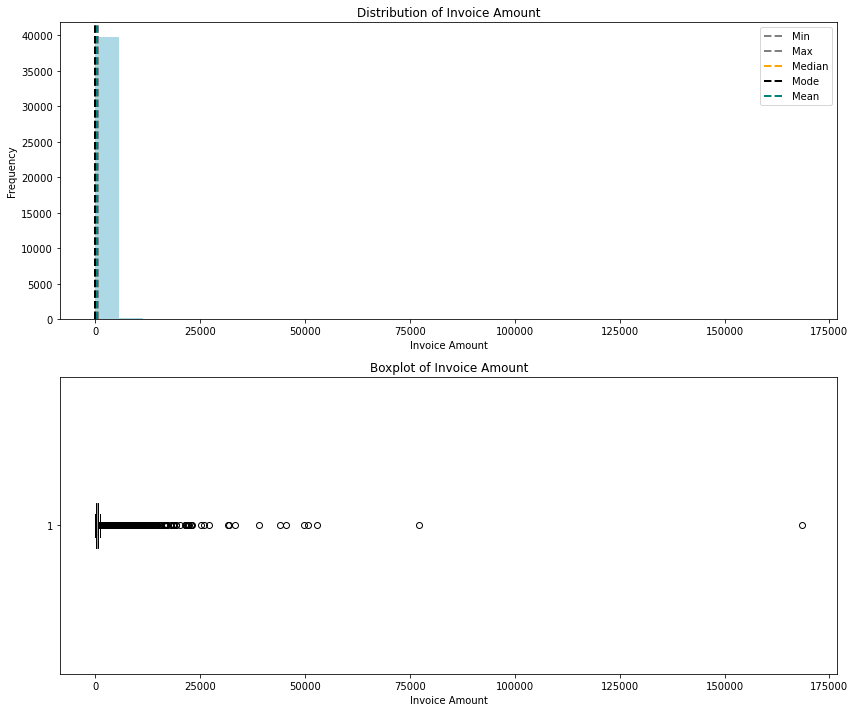

In [60]:
# Distribution of invoice amounts
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.hist(invoice_total, bins=30, color='lightblue')
plt.axvline(min_amount, color='grey', linestyle='dashed', linewidth=2, label='Min')
plt.axvline(max_amount, color='grey', linestyle='dashed', linewidth=2, label='Max')
plt.axvline(median_amount, color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mode_amount, color='black', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(mean_amount, color='teal', linestyle='dashed', linewidth=2, label='Mean')

plt.title('Distribution of Invoice Amount')
plt.xlabel('Invoice Amount')
plt.ylabel('Frequency')
plt.legend()

# Boxplot of Invoice Amounts
plt.subplot(2, 1, 2)
plt.boxplot(invoice_total, vert=False)
plt.title('Boxplot of Invoice Amount')
plt.xlabel('Invoice Amount')

plt.tight_layout()
plt.show()

Minimun: 0.19
Maximun: 724.2499999999999
Median: 256.235
Mode: 15.0
Mean: 271.68389129924515


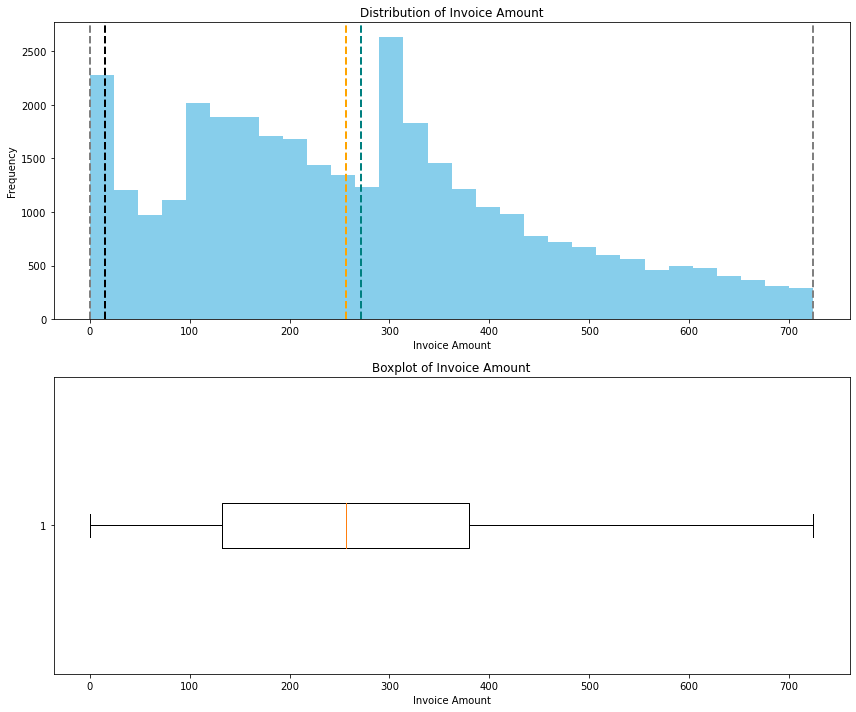

In [59]:
quantile_85 = invoice_total.quantile(0.85)
remove_outliers = invoice_total[invoice_total <= quantile_85]

min_amount = remove_outliers.min()
max_amount = remove_outliers.max()
median_amount = remove_outliers.median()
mode_amount = remove_outliers.mode().iloc[0]
mean_amount = remove_outliers.mean()

print(f"Minimun: {min_amount}")
print(f"Maximun: {max_amount}")
print(f"Median: {median_amount}")
print(f"Mode: {mode_amount}")
print(f"Mean: {mean_amount}")

# Draw the distribution for the first 85 quantiles of the invoice amount data
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.hist(remove_outliers, bins=30, color='skyblue')
plt.axvline(remove_outliers.min(), color='grey', linestyle='dashed', linewidth=2, label='Min')
plt.axvline(remove_outliers.max(), color='grey', linestyle='dashed', linewidth=2, label='Max')
plt.axvline(remove_outliers.median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(remove_outliers.mode().iloc[0], color='black', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(remove_outliers.mean(), color='teal', linestyle='dashed', linewidth=2, label='Mean')

plt.title('Distribution of Invoice Amount')
plt.xlabel('Invoice Amount')
plt.ylabel('Frequency')

# Boxplot of Invoice Amounts
plt.subplot(2, 1, 2)
plt.boxplot(remove_outliers, vert=False)
plt.title('Boxplot of Invoice Amount')
plt.xlabel('Invoice Amount')

plt.tight_layout()
plt.show()

# Monthly Placed and Canceled Orders

In [26]:
# Create new integer column 'year_month' with YYYYMM format
retail_df['year_month'] = retail_df['invoice_date'].dt.strftime('%Y%m')
retail_df['year_month'] = retail_df['year_month'].astype(int)
retail_df.head()

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country,invoice_amount,year_month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,200912
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,200912


In [27]:
# Total orders per month
monthly_total_orders = retail_df.groupby('year_month')['invoice'].nunique()
monthly_total_orders.head()

year_month
200912    2330
201001    1633
201002    1969
201003    2367
201004    1892
Name: invoice, dtype: int64

In [28]:
# Total cancelled invoice
cancelled_orders = retail_df[retail_df['invoice'].str.startswith('C')]

# Cancelled orders per month
monthly_cancelled_orders = cancelled_orders.groupby('year_month')['invoice'].nunique()
monthly_cancelled_orders.head()

year_month
200912    401
201001    300
201002    240
201003    407
201004    304
Name: invoice, dtype: int64

In [29]:
# Orders placed per month
monthly_placed_orders = monthly_total_orders - 2 * monthly_cancelled_orders
monthly_placed_orders.head()

year_month
200912    1528
201001    1033
201002    1489
201003    1553
201004    1284
Name: invoice, dtype: int64

In [55]:
# monthly_cancelled_orders and monthly_placed_orders dataframes
monthly_cancelled_orders_df = monthly_cancelled_orders.to_frame(name='cancelled_orders')
monthly_placed_orders_df = monthly_placed_orders.to_frame(name='placed_orders')

# Merged dataframes based on 'year_month' column
merged_df = pd.merge(monthly_placed_orders_df, monthly_cancelled_orders_df, left_index=True, right_index=True)
merged_df.head()

,placed_orders,cancelled_orders
year_month,,
200912,1528,401
201001,1033,300
201002,1489,240
201003,1553,407
201004,1284,304


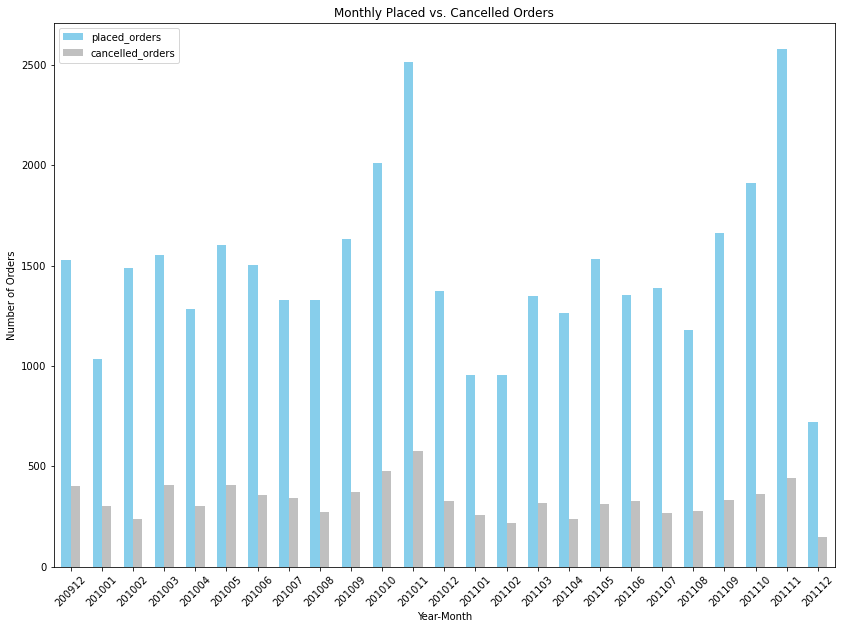

In [65]:
# Monthly Placed vs. Cancelled Orders plot
orders_plot = merged_df.plot(kind='bar', width=0.6, figsize=(14, 10), color = ['skyblue', 'silver'])
orders_plot.set_title('Monthly Placed vs. Cancelled Orders')
orders_plot.set_xlabel('Year-Month')
plt.xticks(rotation=45)
orders_plot.set_ylabel('Number of Orders')

plt.show()

# Monthly Sales

In [53]:
# Calculate monthly sale data
monthly_sales = retail_df.groupby('year_month')['invoice_amount'].sum()
monthly_sales = monthly_sales.to_frame(name = 'sales')
monthly_sales.head()

,sales
year_month,
200912,799847.110
201001,624032.892
201002,533091.426
201003,765848.761
201004,590580.432


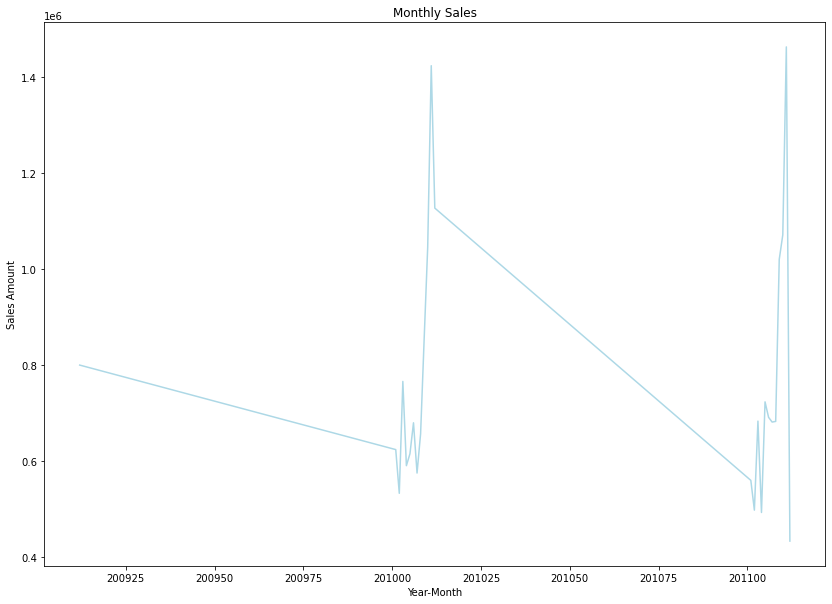

In [54]:
# Plot showing monthly sales 
plt.figure(figsize=(14,10))
plt.plot(monthly_sales.index, monthly_sales['sales'], color='lightblue')

plt.title('Monthly Sales')
plt.xlabel('Year-Month')
plt.ylabel('Sales Amount')
plt.show()

# Monthly Sales Growth


In [41]:
# Calculate monthly sales percentage growth data
monthly_sales = retail_df.groupby('year_month')['invoice_amount'].sum()

percentage_growth = monthly_sales.pct_change() * 100
percentage_growth.head() 

year_month
200912          NaN
201001   -21.980978
201002   -14.573185
201003    43.661804
201004   -22.885501
Name: invoice_amount, dtype: float64

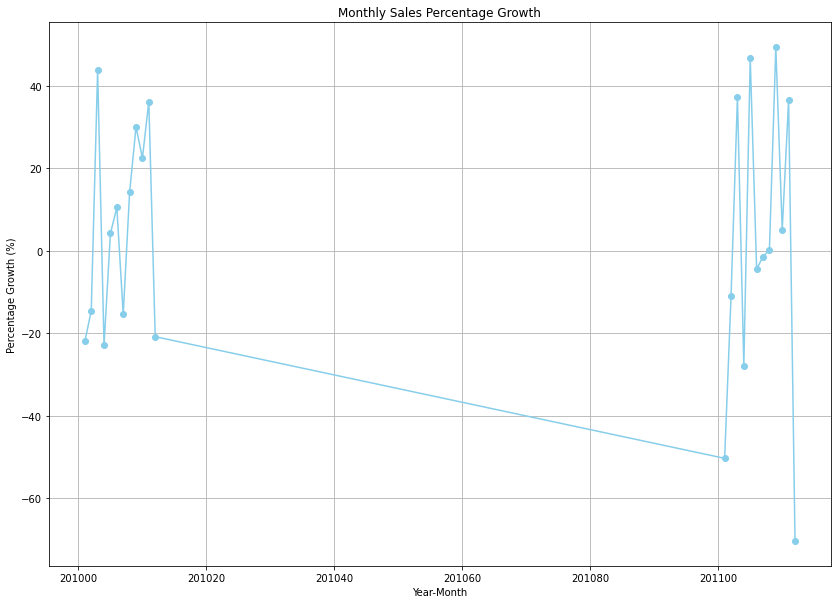

In [64]:
# Plot showing percentage growth
plt.figure(figsize=(14, 10))
plt.plot(percentage_growth.index, percentage_growth.values, color='skyblue', marker='o', linestyle='-')
plt.title('Monthly Sales Percentage Growth')
plt.xlabel('Year-Month')
plt.ylabel('Percentage Growth (%)')
plt.grid(True)
plt.show()

# Monthly Active Users

In [62]:
# Compute the of active users for each month
active_users = retail_df.groupby('year_month')['customer_id'].nunique()
active_users.head()

year_month
200912    1045
201001     786
201002     807
201003    1111
201004     998
Name: customer_id, dtype: int64

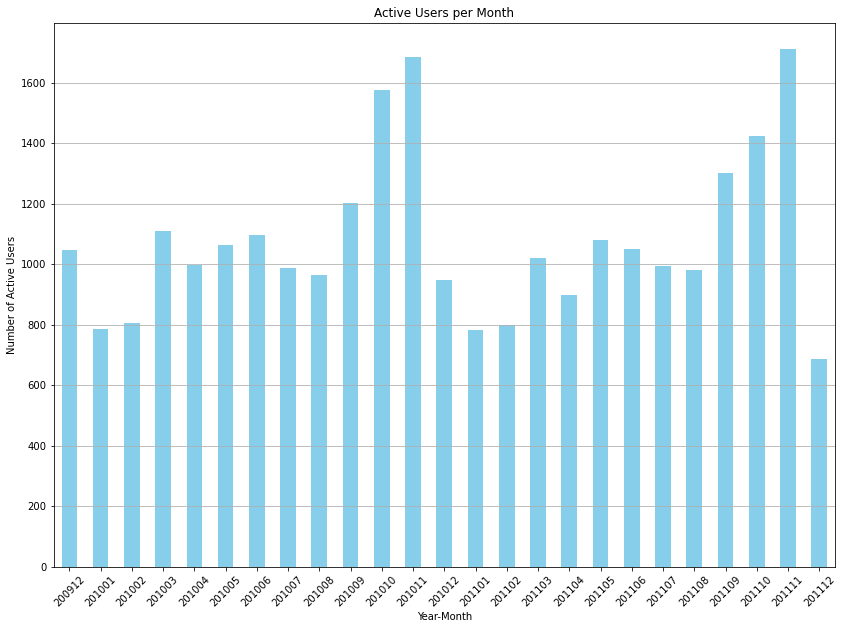

In [66]:
# Plot showing number of active users for each month
plt.figure(figsize=(14, 10))
active_users.plot(kind='bar', color='skyblue')
plt.title('Active Users per Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Active Users')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# New and Existing Users



In [93]:
# Find first purchase year-month for each user
first_purchase = retail_df.groupby('customer_id')['year_month'].min().reset_index()
first_purchase.columns = ['customer_id', 'first_purchase']

# Merge the first purchase data with the transactional data
merged_df = pd.merge(retail_df, first_purchase, on='customer_id', how='left')
merged_df

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country,invoice_amount,year_month,first_purchase
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,200912,200912.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,200912,200912.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,200912,200912.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,200912,200912.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,200912,200912.0
...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,201112,201108.0
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,201112,201108.0
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,201112,201108.0
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,201112,201108.0


In [94]:
# Classify each transaction as belonging to a new or existing user
merged_df['user_type'] = 'Existing'
merged_df.loc[merged_df['year_month'] == merged_df['first_purchase'], 'user_type'] = 'New'

# Group data by 'year_month' and 'user_type' and count the number of users for each group
user_counts = merged_df.groupby(['year_month', 'user_type']).size().unstack(fill_value=0)
user_counts.head()

user_type,Existing,New
year_month,,
200912,13468,31760
201001,21930,9625
201002,19699,9689
201003,29167,12344
201004,27278,6779


<Figure size 1008x720 with 0 Axes>

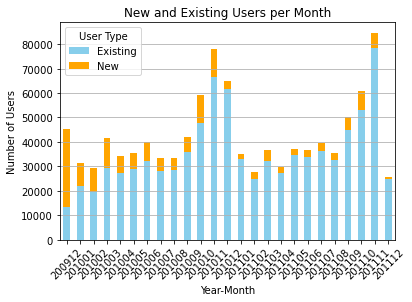

In [95]:
# Plot showing new and existing users for each month
plt.figure(figsize=(14, 10))

user_counts.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('New and Existing Users per Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.grid(axis='y')
plt.show()

## Finding RFM

In [96]:
# Get the latest purchase date of each customer
latest_purchase_date = retail_df.groupby('customer_id')['invoice_date'].max()

# Get the difference between the current date and last purchase date of each customer
current_date = pd.to_datetime('today')
recency = (current_date - latest_purchase_date).dt.days
recency.head()

customer_id
12346.0    4853
12347.0    4529
12348.0    4603
12349.0    4546
12350.0    4837
Name: invoice_date, dtype: int64

In [97]:
# Get the purchase frequency of each customer
frequency = retail_df.groupby('customer_id')['invoice'].nunique()
frequency.head()

customer_id
12346.0    17
12347.0     8
12348.0     5
12349.0     5
12350.0     1
Name: invoice, dtype: int64

In [98]:
# Get the total monetary values of each customer
monetary = retail_df.groupby('customer_id')['invoice_amount'].sum()
monetary.head()

customer_id
12346.0     -64.68
12347.0    5633.32
12348.0    2019.40
12349.0    4404.54
12350.0     334.40
Name: invoice_amount, dtype: float64

In [99]:
# Create the RFM table
rfm_table = pd.concat([recency, frequency, monetary], axis=1)
rfm_table.columns = ['recency', 'frequency', 'monetary']
rfm_table

,recency,frequency,monetary
customer_id,,,
12346.0,4853,17,-64.68
12347.0,4529,8,5633.32
12348.0,4603,5,2019.40
12349.0,4546,5,4404.54
12350.0,4837,1,334.40
...,...,...,...
18283.0,4531,22,2736.65
18284.0,4957,2,436.68
18285.0,5188,1,427.00


# RFM Segmentation

In [100]:
# RFM score values 
rfm_table['recency_score'] = pd.qcut(rfm_table['recency'],5,labels=[5,4,3,2,1])
rfm_table['frequency_score'] = pd.qcut(rfm_table['frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
rfm_table['monetary_score'] = pd.qcut(rfm_table['monetary'],5,labels=[1,2,3,4,5])

rfm_table.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
customer_id,,,,,,
12346.0,4853,17,-64.68,2,5,1
12347.0,4529,8,5633.32,5,4,5
12348.0,4603,5,2019.40,3,3,4
12349.0,4546,5,4404.54,5,3,5
12350.0,4837,1,334.40,2,1,2


In [101]:
# RFM score values combined side by side in str format
(rfm_table['recency_score'].astype(str) + 
 rfm_table['frequency_score'].astype(str) + 
 rfm_table['monetary_score'].astype(str)).head()

customer_id
12346.0    251
12347.0    545
12348.0    334
12349.0    535
12350.0    212
dtype: object

In [102]:
# RFM score calculation
rfm_table["RFM_SCORE"] = rfm_table['recency_score'].astype(str) + rfm_table['frequency_score'].astype(str) + rfm_table['monetary_score'].astype(str)
rfm_table.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
customer_id,,,,,,,
12346.0,4853,17,-64.68,2,5,1,251
12347.0,4529,8,5633.32,5,4,5,545
12348.0,4603,5,2019.40,3,3,4,334
12349.0,4546,5,4404.54,5,3,5,535
12350.0,4837,1,334.40,2,1,2,212


In [103]:
# Transposition of the RFM table
rfm_table.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,5942.0,4730.217940,211.859644,4528.00,4552.0000,4623.00,4909.000,5266.00
frequency,5942.0,7.552339,15.972262,1.00,2.0000,4.00,8.000,510.00
monetary,5942.0,2801.799459,13973.922553,-25111.09,325.0975,843.97,2182.005,598215.22


In [104]:
# Customers with RFM Score 555
rfm_table[rfm_table["RFM_SCORE"] == "555"].head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
customer_id,,,,,,,
12359.0,4535,14,8714.89,5,5,5,555
12362.0,4530,14,5284.58,5,5,5,555
12395.0,4543,18,5046.92,5,5,5,555
12417.0,4531,27,6708.21,5,5,5,555
12433.0,4528,11,20428.86,5,5,5,555


In [105]:
# Customers with RFM Score 111
rfm_table[rfm_table["RFM_SCORE"] == "111"].head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
customer_id,,,,,,,
12382.0,5209,1,-18.38,1,1,1,111
12387.0,4942,1,143.94,1,1,1,111
12392.0,5119,1,234.75,1,1,1,111
12400.0,4942,1,205.25,1,1,1,111
12404.0,5209,1,63.24,1,1,1,111


In [106]:
# Segmenting of customers according to recency_score and frequency_score values
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [107]:
# Segment variable
rfm_table['segment'] = rfm_table['recency_score'].astype(str) + rfm_table['frequency_score'].astype(str)
rfm_table.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
customer_id,,,,,,,,
12346.0,4853,17,-64.68,2,5,1,251,25
12347.0,4529,8,5633.32,5,4,5,545,54
12348.0,4603,5,2019.40,3,3,4,334,33
12349.0,4546,5,4404.54,5,3,5,535,53
12350.0,4837,1,334.40,2,1,2,212,21


In [108]:
# Replace segment values from score to segment names
rfm_table['segment'] = rfm_table['segment'].replace(seg_map, regex=True)
rfm_table.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
customer_id,,,,,,,,
12346.0,4853,17,-64.68,2,5,1,251,Can't Lose
12347.0,4529,8,5633.32,5,4,5,545,Champions
12348.0,4603,5,2019.40,3,3,4,334,Need Attention
12349.0,4546,5,4404.54,5,3,5,535,Potential Loyalists
12350.0,4837,1,334.40,2,1,2,212,Hibernating


In [109]:
rfm_table[["segment", "recency","frequency","monetary"]].groupby("segment").agg(["mean","count"])

recency        frequency            monetary      
                            mean count       mean count          mean count
segment                                                                    
About to Sleep       4634.728460   383   1.459530   383    490.856428   383
At Risk              4903.083444   755   4.668874   755   1167.566649   755
Can't Lose           4847.534884    86  17.627907    86   5670.732581    86
Champions            4535.311189   858  23.496503   858  10490.329237   858
Hibernating          4992.805339  1536   1.336589  1536    339.887241  1536
Loyal Customers      4594.903226  1147  11.950305  1147   3972.611051  1147
Need Attention       4639.298182   275   3.669091   275   1062.028113   275
New Customers        4537.745455    55   1.000000    55    361.456364    55
Potential Loyalists  4552.185034   735   2.965986   735    902.240503   735
Promising            4565.169643   112   1.000000   112    327.319554   112